<a href="https://colab.research.google.com/github/bspoloo/SIS420-012024/blob/main/Parciales/Segundo%20Parcial/Aprendizaje%20no%20supervisado/D2(171).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segundo parcial (Aprendizaje no supervisado)
 <h3>Implementacion del clustering haciendo uso del algoritmo K-Means.<h3>
 <HR>
 <h3>
  NOMBRES:

  * POLO ORELLANA BRAYAN SIMON
  <br>
  CARRERA: INGENIERIA DE SISTEMAS
  <BR>
  FECHA: 04/06/2024 <BR>

  * [Enlace de invitacion para ser colaborador](https://github.com/bspoloo/SIS420-012024/invitations)
  
  * [Enlace al git hub](https://github.com/bspoloo/SIS420-012024/tree/main/Parciales/Tercer%20Parcial)

 <h3>

Para el parcial hizo uso del dataset `MiningProcess_Flotation_Plant_Database.csv` para aplpicar el modelo de **clustering** usando el algoritmo de **k-means**.

El enlace al dataset es [Quality Prediction in a Mining Process](https://www.kaggle.com/datasets/edumagalhaes/quality-prediction-in-a-mining-process).

El archivo `MiningProcess_Flotation_Plant_Database.csv` bases de datos de plantas de fabricación del mundo real, especialmente de plantas mineras, que proviene de una de las partes más importantes de un proceso minero: ¡una planta de flotación!



# ML - Aprendizaje No Supervisado

Si bien todos los ejemplos de *Machine Learning* que hemos visto hasta ahora en esta serie se han basado en aprendizaje supervisado (nuestros datos van acompañados de las etiquetas correspondientes, ejemplos de la tarea que queremos llevar a cabo) la mayoría de los datos no están etiquetados.

Antes con esta problemática se tenia dos alternativas:
* etiquetar datos manualmente (lo cual require de tiempo, esfuerzo y dinero en el caso de querer desarrollar sistemas reales)
* bien usar técnicas de aprendizaje no supervisado, o *Unsupervised Learning* en inglés.

## Clustering

De entre las diferentes técnicas de aprendizaje no supervisado, el *Clustering* es una de las más usadas. Este técnica consiste en identificar aquellas muestras similares del conjunto de datos y asignarlas a un *cluster*, o grupo. Esto permite aplicaciones tales como:
* segmentación de clientes.
* análisis de datos.
* reducción de la dimensionalidad.
* detección de anomalías.
* aprendizaje semi-supervisado.
* motores de búsqueda.
* semgentación de imágenes.

### K-Means

El algoritmo de *K-Means* es uno de los más usados a la hora de aplicar *Clustering*, ya que es un método rápido y eficiente. Vamos a generar un conjunto de datos sintético para aprender a usar esta técnica.

#### Importamos las librerisa necesarias

In [12]:
from sklearn.datasets import make_blobs #Para generar conjuntos de datos simulados con una distribución específica
import numpy as np #para el manejo de matrices y vectores

# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Optimization module in scipy
from scipy import optimize

# will be used to load MATLAB mat datafile format
from scipy.io import loadmat

import pandas as pd
#esta tabulate nos sirve para hacer tablas
from tabulate import tabulate

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
# tells matplotlib to embed plots within the notebook
#Para separa el 20% y 80%
from sklearn.model_selection import train_test_split
%matplotlib inline

## K-Means para aprendizaje no supervisado.

El aprendizaje semi-supervisado (o *Semi-supervised Learning*) comprende el conjunto de técnicas que nos permiten entrenar modelos con datasets parcialmente etiquetados.

In [41]:
def  featureNormalize(X):
    X_norm = X.copy()

    #creamos un array de ceros con una longitud igual al número de columnas en el array X. La variable mu y sigma se inicializa como este array de ceros.
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    #Creamos el promedio de cada columna de X
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)

    # sigma[sigma == 0] = 1

    #normalizamos los datos con la siguiente formula
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

### Carga del dataset

In [31]:
def graficar_imagenes(data, num_images=5):
    # Asegúrate de que no estamos intentando graficar más imágenes de las que existen en el dataset
    num_images = min(num_images, len(data))

    # Define el tamaño de la figura
    plt.figure(figsize=(10, 2 * num_images))

    for i in range(num_images):
        # Extrae la imagen y la redimensiona
        image = data.iloc[i].values
        image = image.reshape(32, 32, 3)
        image = image.astype(np.uint8)

        # Crea un subplot para cada imagen
        plt.subplot(1, num_images, i + 1)
        plt.imshow(image)
        plt.axis('off')

    plt.show()

In [15]:
# dataset = pd.read_csv('/content/gdrive/MyDrive/Datasets/MiningProcess_Flotation_Plant_Database.csv', delimiter=',')
dataset = pd.read_csv('./data_1.csv', delimiter=',')

dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,87.0,40.0,238.0,87.0,40.0,238.0,87.0,40.0,238.0,87.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 3072 entries, 0 to 3071
dtypes: float64(3072)
memory usage: 1.1 GB


In [39]:
dataset.describe()

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.001740,0.000800,0.004760,0.001740,0.000800,0.004760,0.001740,0.000800,0.004760,0.001740,...,0.005100,0.005100,0.005100,0.005100,0.005100,0.005100,0.005100,0.005100,0.005100,0.005100
std,0.389076,0.178885,1.064368,0.389076,0.178885,1.064368,0.389076,0.178885,1.064368,0.389076,...,1.140395,1.140395,1.140395,1.140395,1.140395,1.140395,1.140395,1.140395,1.140395,1.140395
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,87.000000,40.000000,238.000000,87.000000,40.000000,238.000000,87.000000,40.000000,238.000000,87.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


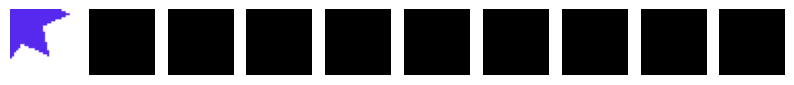

In [37]:
graficar_imagenes(dataset, num_images=10)

Verficamos que no exista valores nulos:

In [40]:
dataset.isna().any()

0       False
1       False
2       False
3       False
4       False
        ...  
3067    False
3068    False
3069    False
3070    False
3071    False
Length: 3072, dtype: bool

Se observa que todos los datos son de enteros, por lo tanto no se realiza ningun tipo de procesamiento de datos.

#### Normalizacion de las caracteristicas

In [102]:
print("la cantidad total de datos: ", dataset.shape[0])

la cantidad total de datos:  50000


Como podemos observar en siguiente cuadro, se ve que el valor minimo y maximo en todos es demasiado diferente, para eso normalizaremos los datos, esto para que esten a una misma escala y el modelo pueda converger mejor:

In [103]:
dataset_norm, mu, sigma = featureNormalize(dataset)
dataset_norm.describe()
dataset.describe()

,0,1,2,3,4,5,6,7,8,9,...,3063,3064,3065,3066,3067,3068,3069,3070,3071,Cluster
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.001740,0.000800,0.004760,0.001740,0.000800,0.004760,0.001740,0.000800,0.004760,0.001740,...,0.005100,0.005100,0.005100,0.005100,0.005100,0.005100,0.005100,0.005100,0.005100,0.000020
std,0.389076,0.178885,1.064368,0.389076,0.178885,1.064368,0.389076,0.178885,1.064368,0.389076,...,1.140395,1.140395,1.140395,1.140395,1.140395,1.140395,1.140395,1.140395,1.140395,0.004472
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,87.000000,40.000000,238.000000,87.000000,40.000000,238.000000,87.000000,40.000000,238.000000,87.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,1.000000


Verificamos que no haya duplicados:

In [46]:
# Verificar duplicados
duplicados = dataset_norm.duplicated().sum()
print(f'Número de duplicados: {duplicados}')

# Eliminar duplicados
dataset_norm_dedup = dataset_norm.drop_duplicates()

Número de duplicados: 49998


In [51]:
dataset_norm_dedup

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,223.604562,223.604562,223.604562,223.604562,223.604562,223.604562,223.604562,223.604562,223.604562,223.604562,...,223.604562,223.604562,223.604562,223.604562,223.604562,223.604562,223.604562,223.604562,223.604562,223.604562
1,-0.004472,-0.004472,-0.004472,-0.004472,-0.004472,-0.004472,-0.004472,-0.004472,-0.004472,-0.004472,...,-0.004472,-0.004472,-0.004472,-0.004472,-0.004472,-0.004472,-0.004472,-0.004472,-0.004472,-0.004472


#### Calculo del numero de clusters

Imagina que el dataset no estuviese etiquetado, es decir, que tuviésemos solo los dígitos sin la clase (sólo $X$ y no $y$) y tampoco supiésemos cuantas clases diferentes tenemos. Lo primero que podríamos hacer es entrenar un modelo de *K-Means* con, por ejemplos, 50 grupos.

en ``kmeans.fit_transform(X_train)`` transformamos X_train en una matriz de distancias a los centroides de los clústeres. X_digits_dist contendrá una matriz donde cada fila representará una instancia de X_train y cada columna representará la distancia de esa instancia a cada uno de los 50 centroides de los clústeres.

* la fila es la instancia de X_train.
* la columna es la distancia de esa instancia a cada centroide de los 50 clusteres.

#### Aplicacion del metodo de la silueta:

f:\programas\Python\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
f:\programas\Python\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
f:\programas\Python\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
f:\programas\Python\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
f:\programas\Python\Lib\site-packages\sklearn\base.py:1474: Conv

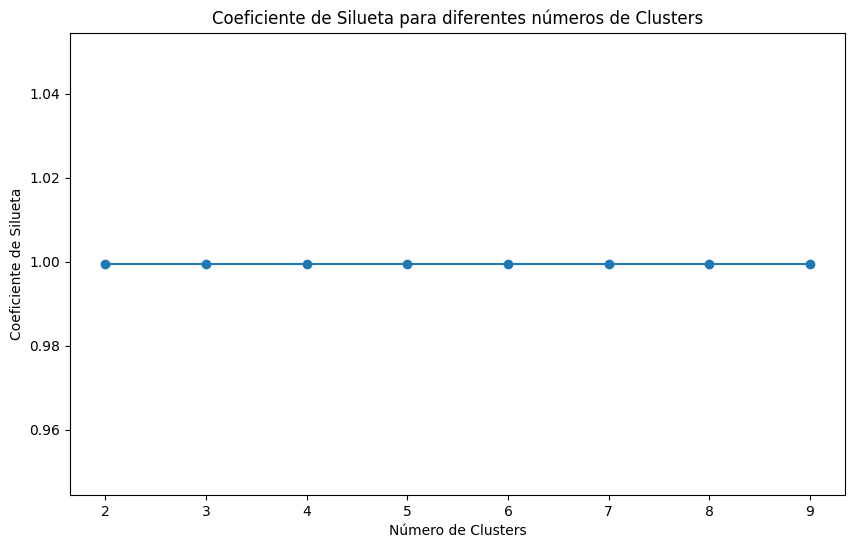

In [101]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(dataset_norm[:2000])
    score = silhouette_score(dataset_norm[:2000], labels)
    silhouette_scores.append(score)

# Graficar el coeficiente de silueta
plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Coeficiente de Silueta')
plt.title('Coeficiente de Silueta para diferentes números de Clusters')
plt.show()

In [88]:
silhouette_scores

[0.9995, 0.9995, 0.9995, 0.9995, 0.9995, 0.9995, 0.9995, 0.9995]

In [89]:
max_score_idx = np.argmax(silhouette_scores) + 2
max_score = max(silhouette_scores)
print("El mejor valor de K es:", max_score_idx, "con coeficiente de silueta de:", max_score)

El mejor valor de K es: 2 con coeficiente de silueta de: 0.9995


#### Aplicacion del metodo del codo:

f:\programas\Python\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
f:\programas\Python\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
f:\programas\Python\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
f:\programas\Python\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
f:\programas\Python\Lib\site-packages\sklearn\base.py:1474: Conv

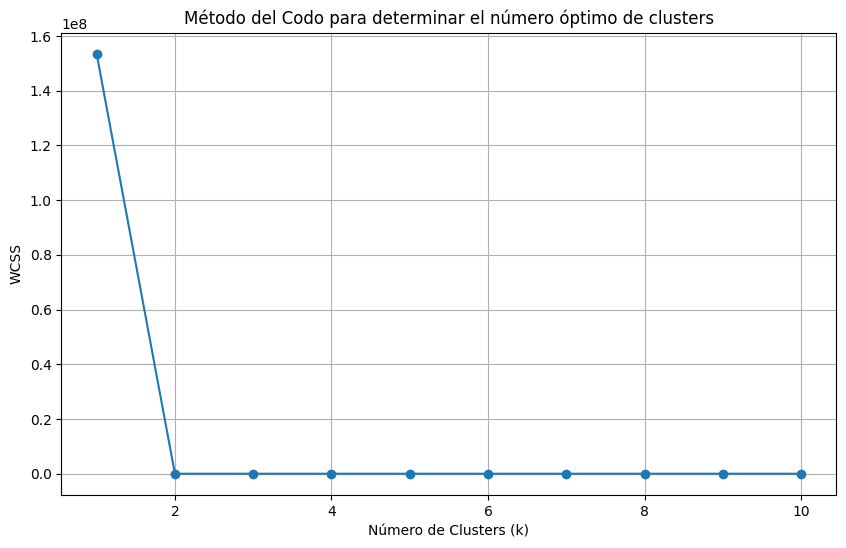

In [80]:
def optimal_number_of_clusters(X, max_k=20):
    wcss = []
    valores_k = list(range(1, max_k + 1))

    for k in valores_k:
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)

    # Graficar WCSS
    plt.figure(figsize=(10, 6))
    plt.plot(valores_k, wcss, marker='o')
    plt.xlabel('Número de Clusters (k)')
    plt.ylabel('WCSS')
    plt.title('Método del Codo para determinar el número óptimo de clusters')
    plt.grid(True)
    plt.show()

    # Encontrar el punto de codo
    diff_wcss = np.diff(wcss)
    second_diff_wcss = np.diff(diff_wcss)
    optimal_k = np.argmin(second_diff_wcss)

    return optimal_k

# Uso de la función
optimal_k = optimal_number_of_clusters(dataset_norm[:2000], max_k=10)

haciendo predicciones para ver a que grupo pertenece algunos datos insertados:

In [90]:
import numpy as np
from sklearn.cluster import KMeans

#nuestro k es 13
k1 = max_score_idx #-> del método de la silueta
k2 = optimal_k#-> del metodo del codo
valores_K = [k1, k2]
best_kmeans = None

for k in valores_K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dataset_norm)
    print("k = ", k, "inertia = ", kmeans.inertia_)

    if (best_kmeans is None or
        kmeans.inertia_ < best_kmeans.inertia_):
        best_kmeans = kmeans

print("el mejor k es: ", best_kmeans.n_clusters)


k =  2 inertia =  9.680943293431669e-23
k =  6 inertia =  9.680943293431669e-23
el mejor k es:  2


f:\programas\Python\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


In [95]:
kmeans = best_kmeans

In [92]:
for i in range(2):
    print("La cantidad de elementos en el grupo ",i," es de: ",len(kmeans.labels_[ kmeans.labels_ == i ]) )

La cantidad de elementos en el grupo  0  es de:  49999
La cantidad de elementos en el grupo  1  es de:  1


In [93]:

dataset['Cluster'] = kmeans.labels_
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,3063,3064,3065,3066,3067,3068,3069,3070,3071,Cluster
0,87.0,40.0,238.0,87.0,40.0,238.0,87.0,40.0,238.0,87.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


#### Visualizando los clusters que se formaron

Aqui aplicamos el analisis de componentes principales para darnos una idea de como se formaron los clusters, esto debido a que no podemos graficar todas las caracteristicas debido a su dimension.

Para esto usaremos y la libreria de `PCA`, para indicar que solo queremos los dos componentes principales.

In [94]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_dataset = pca.fit_transform(dataset_norm)

# Creamos un DataFrame con los dos valores de los componentes principales
pca_dataset_df = pd.DataFrame(data=pca_dataset, columns=['Componente_1', 'Componente_2'])
pca_nombres_df = pd.concat([pca_dataset_df, dataset['Cluster']], axis=1)

pca_nombres_df

,Componente_1,Componente_2,Cluster
0,12393.422772,6.199079e-17,1
1,-0.247873,5.649632e-17,0
2,-0.247873,5.850770e-17,0
3,-0.247873,5.640845e-17,0
4,-0.247873,5.649706e-17,0
...,...,...,...
49995,-0.247873,6.056484e-17,0
49996,-0.247873,6.056484e-17,0
49997,-0.247873,6.056484e-17,0
49998,-0.247873,6.056484e-17,0


Graficando:

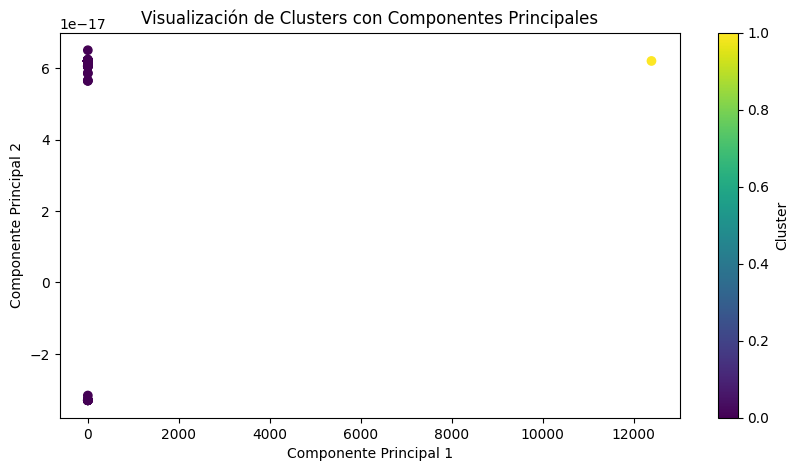

In [98]:
plt.figure(figsize=(10, 5))  # Ajusta el tamaño de la figura según sea necesario
plt.scatter(pca_nombres_df['Componente_1'], pca_nombres_df['Componente_2'], c=pca_nombres_df['Cluster'], cmap='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Visualización de Clusters con Componentes Principales')
plt.colorbar(label='Cluster')
plt.show()
